# Regressão Logística

A regressão logística é uma técnica essencial em problemas de classificação binária, ou seja, quando o objetivo é prever uma entre duas possíveis classes — por exemplo, identificar se um usuário tem ou não uma conta premium em um serviço digital.

### O Problema
O desafio é prever se um usuário possui uma conta paga com base em algumas variáveis, como:

- Quantos anos de experiência ele tem com o serviço
- Qual é o seu salário.

Esses dados são usados como entrada para um modelo que tentará aprender padrões que diferenciem usuários pagantes dos gratuitos.

### Por que não usar Regressão Linear?
Uma primeira ideia seria aplicar uma regressão linear. No entanto, esse tipo de modelo prevê qualquer valor numérico, inclusive negativos ou maiores que 1, o que não faz sentido quando estamos lidando com probabilidades. Além disso, a regressão linear não foi feita para resolver problemas de classificação.

### A Solução: A Função Logística
Para resolver esse problema, usamos a regressão logística, que transforma a saída da combinação linear das variáveis em uma probabilidade entre 0 e 1. Isso é feito com a função logística (também chamada de função sigmoide), que tem a forma de um “S” e aproxima a saída de valores extremos (0 ou 1) de forma suave.

Assim, em vez de prever diretamente se alguém tem uma conta paga, o modelo estima a probabilidade disso acontecer. Se essa probabilidade for maior ou igual a 0.5, classificamos como "sim"; caso contrário, como "não".

```python
def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))
```
Essa função transforma qualquer valor real em um número entre 0 e 1, interpretável como probabilidade.

<img src="funcao_logistica.png" width="800">

### Como o Modelo Aprende
A regressão logística também precisa de um mecanismo de aprendizado. Nesse caso, o objetivo é encontrar os melhores coeficientes (pesos) que resultem em boas previsões. Para isso, usamos um método chamado gradiente descendente, que ajusta os pesos aos poucos, tentando minimizar o erro do modelo.

O erro aqui é definido como a log-verossimilhança negativa, uma função que penaliza previsões ruins e recompensa previsões certeiras. Esse tipo de função é adequada para classificação e permite que o modelo aprenda a separar corretamente os dados em duas classes.

### Treinamento e Avaliação
Depois de definir a função de custo e o método de ajuste dos pesos, o modelo é treinado com os dados. A cada iteração, ele melhora um pouco sua capacidade de prever corretamente quem tem conta premium.

Ao final do treinamento, o modelo pode ser avaliado usando métricas como:

- Precisão: entre os que foram classificados como “sim”, quantos realmente têm conta premium?
- Recall: entre todos os que têm conta premium, quantos foram corretamente identificados?

Depois de treinado, o modelo fornece um conjunto de coeficientes para as variáveis. Esses números indicam como cada variável afeta a probabilidade de um usuário ter uma conta paga:

- Um valor positivo para “experiência”, por exemplo, indica que mais experiência aumenta a chance de assinatura.
- Um valor negativo para “salário” sugere que, nesse caso específico, usuários com salário mais alto têm menor chance de assinar (o que pode fazer sentido dependendo do contexto do serviço).

Esses coeficientes podem ser interpretados com cuidado para gerar insights valiosos sobre o comportamento dos usuários.

## Implementando

Imagine que você trabalha em uma empresa que oferece um aplicativo com planos gratuitos e pagos. Seu objetivo é prever se um usuário possui uma conta paga com base em algumas características pessoais.

Você tem acesso às seguintes variáveis para cada usuário:

- experiencia: Quantos anos de experiência profissional o usuário tem.
- renda anual: Renda anual do usuário (em reais).

A variável alvo é:

- assinante: 1 se o usuário tem uma conta paga (premium), 0 se utiliza o plano gratuito.

In [ ]:
import random

def gerar_dados(n=200):
    dados = []
    for _ in range(n):
        experiencia = round(random.uniform(0.1, 10.0), 1)
        salario = random.randint(30000, 110000)

        # Probabilidade de ser conta paga aumenta com experiência e salário
        probabilidade = 1 / (1 + pow(2.718, -(0.3 * experiencia + 0.00005 * salario - 4)))
        conta_paga = 1 if random.random() < probabilidade else 0

        dados.append((experiencia, salario, conta_paga))

    X = [[1.0, experiencia, salario] for experiencia, salario, _ in dados]
    y = [conta_paga for _, _, conta_paga in dados]

    return X, y

X, y = gerar_dados()

In [147]:
X[:5]

[[1.0, 8.5, 74867],
 [1.0, 1.3, 87974],
 [1.0, 0.2, 83727],
 [1.0, 8.8, 70821],
 [1.0, 3.9, 62890]]

In [148]:
y[:5]

[1, 1, 0, 1, 1]

In [ ]:
from utils import train_test_split, gradient_step, rescale
from reg_logistica import negative_log_gradient, negative_log_likelihood
import tqdm

scaled_X = rescale(X)

random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, 0.33)

learning_rate = 0.01

# começa com um ponto incial aleatório
beta = [random.random() for _ in range(3)]

with tqdm.trange(5000) as t:
    for epoch in t:
        gradient = negative_log_gradient(X_train, y_train, beta)
        beta = gradient_step(beta, gradient, -learning_rate)
        loss = negative_log_likelihood(X_train, y_train, beta)
        t.set_description(f"loss: {loss:.3f} beta: {beta}")

beta

loss: 60.962 beta: [1.2666264088932833, 1.0039728602743085, 1.1112314590696255]: 100%|██████████| 5000/5000 [00:05<00:00, 985.80it/s] 


[1.2666264088932833, 1.0039728602743085, 1.1112314590696255]

Esses são os coeficientes dos dados redimensionados, mas é possível recuperar os dados originais:

In [104]:
from utils import scale

means, stdevs = scale(X)
beta_unscaled = [(beta[0]
                    - beta[1] * means[1] / stdevs[1]
                    - beta[2] * means[2] / stdevs[2]),
                    beta[1] / stdevs[1],
                    beta[2] / stdevs[2]]

beta_unscaled

[-3.46787253620555, 0.23973276059543563, 4.564868870366028e-05]

Os coeficientes que encontramos foram:

- Intercepto: -3.47
- Experiência: +0.24
- Salário: +0.0000456

Esses valores indicam como cada variável impacta a saída da função logística, que por sua vez determina a probabilidade de alguém ter uma conta paga.

De forma geral, quanto maior a experiência, maior a chance de a pessoa ser assinante. O salário também tem uma influência positiva, mas bem mais sutil — mesmo um aumento de R$10.000 no salário só contribui com um pequeno acréscimo na probabilidade.

Vale lembrar que esses impactos não são diretos na probabilidade, mas sim na função logística. Isso significa que:

- Quando o modelo já indica uma alta probabilidade, mudanças nos dados têm pouco efeito.
- Mas quando a probabilidade está próxima de 50%, até pequenos aumentos podem fazer bastante diferença.

No fim das contas, o modelo sugere que a experiência é o fator mais relevante para prever quem é assinante, enquanto o salário tem um papel menor, mas ainda assim positivo.

In [ ]:
from reg_logistica import logistic, dot

true_positives = false_positives = true_negatives = false_negatives = 0

for x_i, y_i in zip(X_test, y_test):
    prediction = logistic(dot(beta, x_i))

    if y_i == 1 and prediction >= 0.5:  # TP: paga e previmos paga
        true_positives += 1
    elif y_i == 1:                      # FN: paga e previmos não paga
        false_negatives += 1
    elif prediction >= 0.5:             # FP: não paga e previmos paga
        false_positives += 1
    else:                               # TN: não paga e previmos não paga
        true_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

print(f"Precisão: {precision:.2%}\nRecall: {recall:.2%}")

Precisão: 78.43%
Recall: 88.89%


Com uma precisão de 78,43% e um recall de 88,89%, podemos concluir que o modelo está se saindo bem na tarefa de identificar corretamente os assinantes.

A alta taxa de recall indica que o modelo consegue encontrar a maioria das pessoas que realmente possuem conta paga, ou seja, ele comete poucos falsos negativos. Já a boa precisão mostra que, entre os casos em que o modelo prevê que alguém é assinante, a maioria realmente é.

Em resumo, é um modelo equilibrado, mas com um leve foco em não deixar passar assinantes reais, o que pode ser positivo em cenários onde é mais importante capturar todos os possíveis clientes pagantes, mesmo que isso gere alguns falsos positivos.

Aqui plotamos as previsões e comparamos com os dados reais:

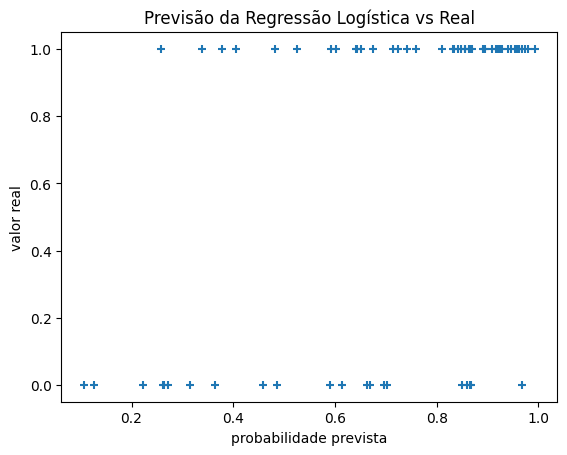

In [ ]:
import matplotlib.pyplot as plt

predictions = [logistic(dot(beta, x_i)) for x_i in X_test]
plt.scatter(predictions, y_test, marker='+')
plt.xlabel("probabilidade prevista")
plt.ylabel("valor real")
plt.title("Previsão da Regressão Logística vs Real")
plt.show()

### Com o Scikit-Learn

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

reg_logistica = LogisticRegression()
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train_sklearn, X_test_sklearn, y_train_sklearn, y_test_sklearn = train_test_split(X_scaled, y, test_size=0.33)

reg_logistica.fit(X_train_sklearn, y_train_sklearn)
pred = reg_logistica.predict(X_test_sklearn)
precision_sklearn = accuracy_score(y_test_sklearn, pred)
recall_sklearn = recall_score(y_test_sklearn, pred)

print(f"Precisão (sklearn): {precision_sklearn:.2%}")
print(f"Recall (sklearn): {recall_sklearn:.2%}")

Precisão (sklearn): 81.82%
Recall (sklearn): 94.12%


Com o modelo de Regressão Logística do scikit-learn, os resultados foram ainda melhores: uma precisão de 81,82% e um recall de 94,12%.

Esses números indicam que o modelo conseguiu identificar corretamente uma proporção ainda maior de assinantes (recall), e com maior confiança nas suas previsões (precisão). Comparado ao modelo implementado do zero, o scikit-learn obteve um desempenho mais alto nos dois aspectos, provavelmente devido a otimizações numéricas e técnicas mais refinadas no processo de ajuste.

No geral, isso reforça como entender o funcionamento interno do modelo ajuda a aprender, mas também mostra o poder das bibliotecas prontas para aplicações reais e de maior escala.

In [145]:
reg_logistica.coef_

array([[0.        , 0.80413878, 1.00670866]])

O coeficiente de experiência (0.80) sugere que, mantendo o salário constante, aumentar um ano de experiência aumenta a probabilidade da pessoa assinar uma conta paga.

O coeficiente de salário (1.00) indica que, também mantendo os demais fatores constantes, um salário maior está associado a uma maior chance de assinatura.

Diferente do modelo anterior, esse resultado mostra que tanto experiência quanto salário influenciam positivamente a probabilidade de uma pessoa ser assinante.

Isso pode indicar um perfil de usuários que estão mais estabilizados profissionalmente e dispostos a investir em ferramentas premium — o que faz sentido em muitos contextos.